In [1]:
from femtoPy.preamble import *
import femtoPy.diffusion as diff
import time as time

14.466228008270264


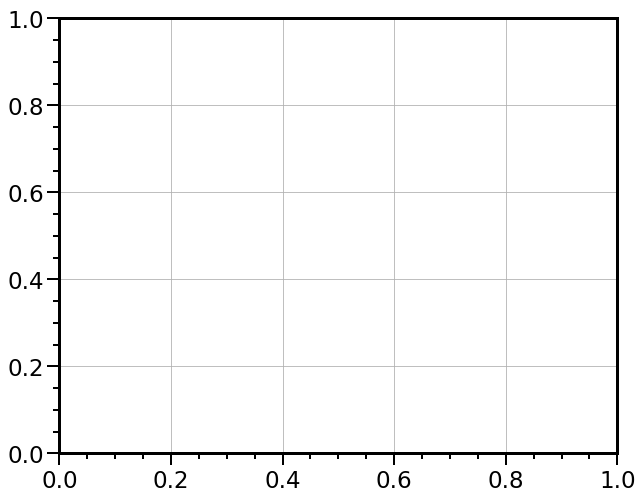

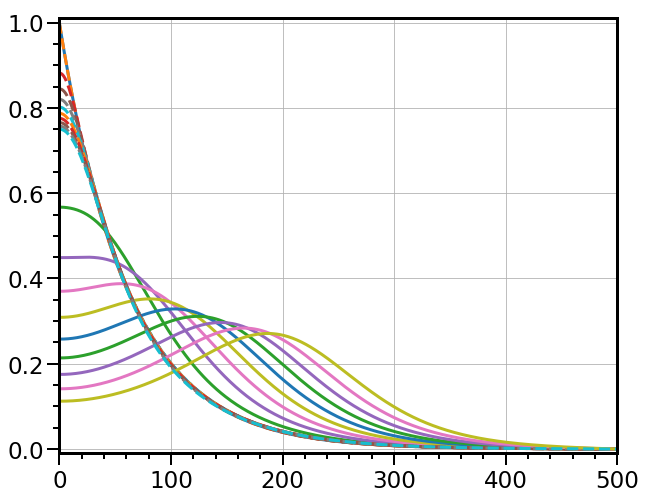

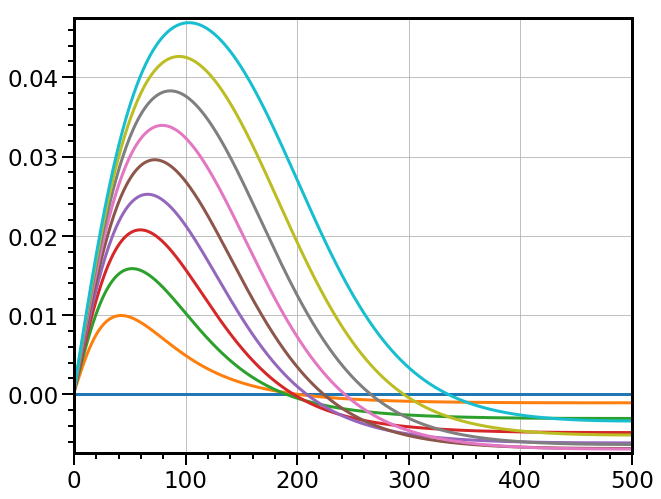

In [4]:
def update(dist,E):
    dist.prep()
    dist.dif_matrix()
    dist.boundary()
    dist.eField(E)
    dist.step()

    return

dt=.05
dy=.01
y_min=0
y_max=5
t_min=0
t_max=1000

grid=diff.classes.Grid(dt=dt,dy=dy,y_min=y_min,y_max=y_max,t_min=t_min,t_max=t_max)
N=np.arange(t_min,t_max,dt).size

def exp(x,alpha):
    y=10*np.exp(-x*alpha)
    return y

s=0
ue=.85
uh=.04
T=np.zeros(grid.t.size)+300
e=1.6e-19
A=1./2100.
elec=diff.classes.Distribution(grid=grid,d0=np.exp(-grid.y*1.62),s=s,u=ue,A=A,q=-e,T=T)
hole=diff.classes.Distribution(grid=grid,d0=np.exp(-grid.y*1.62),s=s,u=uh,A=A,q=e,T=T)
E=diff.classes.Field(grid=grid,E0=np.asmatrix(np.zeros(grid.y.size)).T)

t0=time.time()
for i in range(0,grid.t.size-1):
    E.solveGauss(elec,hole)
    E.field[:,i]=E.field[:,i]*1e-3
    update(elec,E)
    update(hole,E)
print(time.time()-t0)


fig,ax=plt.subplots(figsize=(10,8))
fig,ax2=plt.subplots(figsize=(10,8))
X,Y=np.meshgrid(np.asarray(grid.t)[0,:],np.asarray(grid.y)[:,0])
for i in range(0,1000,100):
    ax.plot(elec.density[:,i])
    ax.plot(hole.density[:,i],linestyle='--')
    ax2.plot(E.field[:,i])

plt.show()


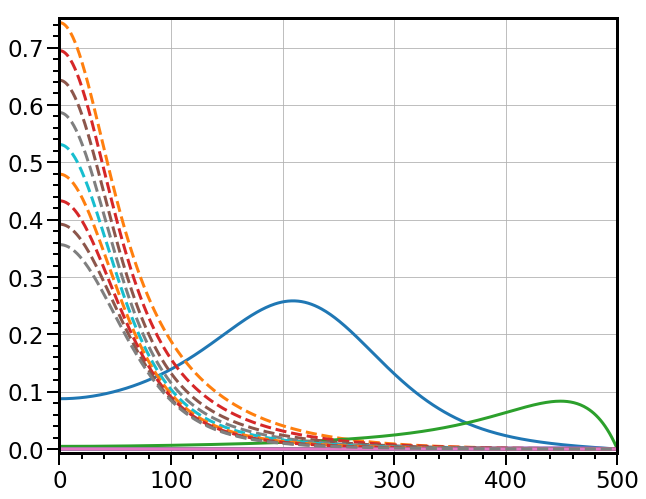

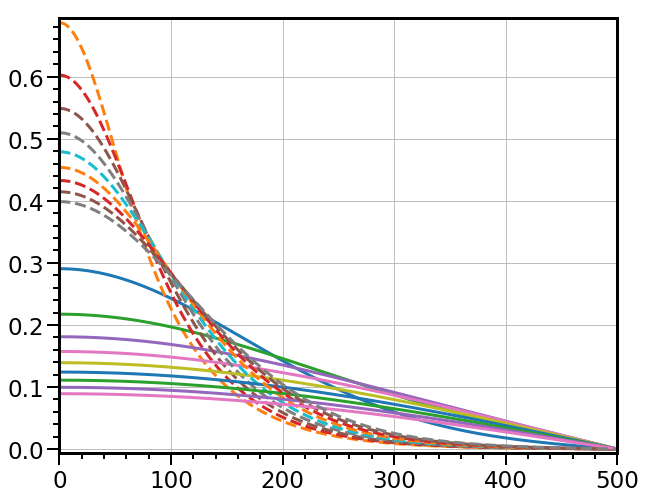

In [7]:
e1=elec
h1=hole
E1=E

fig,ax=plt.subplots(figsize=(10,8))
# fig,ax2=plt.subplots(figsize=(10,8))
X,Y=np.meshgrid(np.asarray(grid.t)[0,:],np.asarray(grid.y)[:,0])


for i in range(1000,10000,1000):
    ax.plot(e1.density[:,i])
    ax.plot(h1.density[:,i],linestyle='--')
#     ax2.plot(E1.field[:,i])
#     ax2.plot(E1.d1[:,i])

fig,ax=plt.subplots(figsize=(10,8))
# fig,ax2=plt.subplots(figsize=(10,8))
X,Y=np.meshgrid(np.asarray(grid.t)[0,:],np.asarray(grid.y)[:,0])


for i in range(1000,10000,1000):
    ax.plot(e2.density[:,i])
    ax.plot(h2.density[:,i],linestyle='--')
#     ax2.plot(E2.field[:,i])
#     ax2.plot(E2.d1[:,i])    

plt.show()


In [25]:
import bandmat as bm

a_bm = bm.BandMat(
    1, 1,
    np.array([
        [0.0, 0,-1,-1,-1],
        [0,0,0,0,0],
        [-1.,-1.,-1.,0,0],
    ])
)

b_bm = bm.BandMat(
    0, 0,
    np.array([
        [0.3, 0.1, 0.5, 0.6, 0.0],
    ])
)

c_bm = bm.dot_mm(a_bm.T, b_bm)

d_bm = a_bm + b_bm

a_full = a_bm.full()
b_full = b_bm.full()
c_full = c_bm.full()
d_full = d_bm.full()

print('a_full:')
print (a_full)
print
print ('b_full:')
print (b_full)
print
print ('np.dot(a_full.T, b_full):')
print (c_full)
print
print ('a_full + b_full:')
print (d_full)
print


a_full:
[[ 0.  0.  0.  0.  0.]
 [-1.  0. -1.  0.  0.]
 [ 0. -1.  0. -1.  0.]
 [ 0.  0. -1.  0. -1.]
 [ 0.  0.  0.  0.  0.]]
b_full:
[[ 0.3  0.   0.   0.   0. ]
 [ 0.   0.1  0.   0.   0. ]
 [ 0.   0.   0.5  0.   0. ]
 [ 0.   0.   0.   0.6  0. ]
 [ 0.   0.   0.   0.   0. ]]
np.dot(a_full.T, b_full):
[[ 0.  -0.1  0.   0.   0. ]
 [ 0.   0.  -0.5  0.   0. ]
 [ 0.  -0.1  0.  -0.6  0. ]
 [ 0.   0.  -0.5  0.   0. ]
 [ 0.   0.   0.  -0.6  0. ]]
a_full + b_full:
[[ 0.3  0.   0.   0.   0. ]
 [-1.   0.1 -1.   0.   0. ]
 [ 0.  -1.   0.5 -1.   0. ]
 [ 0.   0.  -1.   0.6 -1. ]
 [ 0.   0.   0.   0.   0. ]]


<function print>